<a href="https://colab.research.google.com/github/Ifroza/project/blob/main/425_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install torch torchvision
!pip install datasets
!pip install transformers
!pip install scikit-learn
!pip install matplotlib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 41.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 28.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 29.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 39.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

Loading AG News dataset...


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/8.07k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/18.6M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/1.23M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/120000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/7600 [00:00<?, ? examples/s]

Loading BERT tokenizer and model...


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Embedding articles with BERT...
Training Autoencoder...
Epoch 1, Loss: 2.7051
Epoch 2, Loss: 1.3471
Epoch 3, Loss: 1.1492
Epoch 4, Loss: 1.0086
Epoch 5, Loss: 0.9168
Epoch 6, Loss: 0.8494
Epoch 7, Loss: 0.7971
Epoch 8, Loss: 0.7504
Epoch 9, Loss: 0.7107
Epoch 10, Loss: 0.6725
Getting latent features and initializing KMeans...
Training DEC...
Epoch 1, KL Loss: 1.1277
Epoch 2, KL Loss: 2.0213
Epoch 3, KL Loss: 2.3047
Epoch 4, KL Loss: 2.3771
Epoch 5, KL Loss: 2.3577
Epoch 6, KL Loss: 2.3187
Epoch 7, KL Loss: 2.2788
Epoch 8, KL Loss: 2.2347
Epoch 9, KL Loss: 2.1736
Epoch 10, KL Loss: 2.1091
Evaluating clustering...
Silhouette Score: 0.7384
Visualizing clusters with t-SNE...


/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


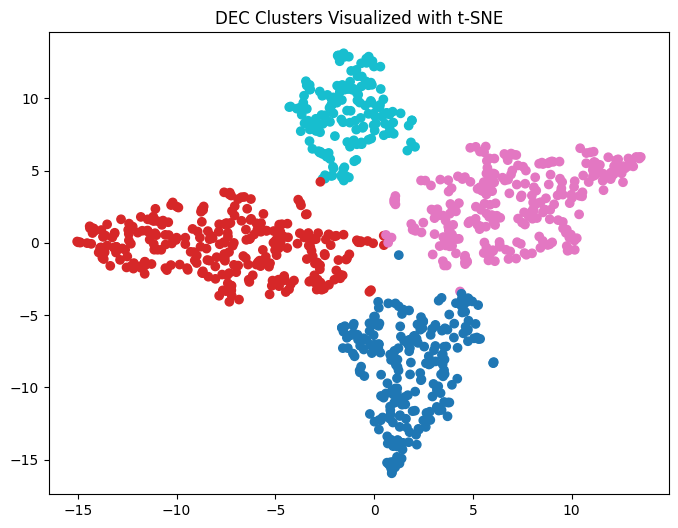

In [ ]:
# Deep Embedded Clustering (DEC) for AG News Dataset with Comments

import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from torch.utils.data import DataLoader, TensorDataset
from sklearn.datasets import fetch_20newsgroups
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from transformers import BertTokenizer, BertModel
from datasets import load_dataset


# ================= Step 1: Load and Embed AG News using BERT =================
print("Loading AG News dataset...")
ag_news = load_dataset("ag_news", split='train[:1000]')  # Subset for faster prototyping

print("Loading BERT tokenizer and model...")
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert = BertModel.from_pretrained('bert-base-uncased')
bert.eval()


def get_bert_embeddings(texts):
    inputs = tokenizer(texts, padding=True, truncation=True, return_tensors="pt", max_length=128)
    with torch.no_grad():
        outputs = bert(**inputs)
    return outputs.last_hidden_state[:, 0, :]  # Use CLS token embedding


print("Embedding articles with BERT...")
texts = [x['text'] for x in ag_news]
labels = [x['label'] for x in ag_news]  # Ground truth (not used for training)

embeddings = []
for i in range(0, len(texts), 32):  # Batch in chunks
    batch_texts = texts[i:i + 32]
    batch_embeds = get_bert_embeddings(batch_texts)
    embeddings.append(batch_embeds)

embeddings = torch.cat(embeddings, dim=0)


# ================= Step 2: Autoencoder Definition =================
class Autoencoder(nn.Module):
    def __init__(self, input_dim=768, hidden_dim=256, latent_dim=64):
        super().__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, latent_dim)
        )
        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, input_dim)
        )

    def forward(self, x):
        z = self.encoder(x)
        x_recon = self.decoder(z)
        return x_recon, z


# ================= Step 3: Train Autoencoder =================
autoencoder = Autoencoder()
optimizer = optim.Adam(autoencoder.parameters(), lr=1e-3)
criterion = nn.MSELoss()

print("Training Autoencoder...")
dataloader = DataLoader(TensorDataset(embeddings), batch_size=64, shuffle=True)
for epoch in range(10):
    total_loss = 0
    for batch in dataloader:
        x = batch[0]
        x_recon, _ = autoencoder(x)
        loss = criterion(x_recon, x)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f"Epoch {epoch + 1}, Loss: {total_loss:.4f}")


# ================= Step 4: KMeans Initialization =================
print("Getting latent features and initializing KMeans...")
with torch.no_grad():
    z = autoencoder.encoder(embeddings).numpy()

kmeans = KMeans(n_clusters=4, n_init=20)
y_pred_init = kmeans.fit_predict(z)
cluster_centers = torch.tensor(kmeans.cluster_centers_, dtype=torch.float)


# ================= Step 5: Deep Embedded Clustering =================
class DEC(nn.Module):
    def __init__(self, autoencoder, cluster_centers):
        super().__init__()
        self.encoder = autoencoder.encoder
        self.cluster_centers = nn.Parameter(cluster_centers)

    def forward(self, x):
        z = self.encoder(x)
        q = 1.0 / (1.0 + torch.sum((z.unsqueeze(1) - self.cluster_centers) ** 2, dim=2))
        q = q / torch.sum(q, dim=1, keepdim=True)  # Soft assignment
        return q, z


def target_distribution(q):
    weight = q ** 2 / q.sum(0)
    return (weight.t() / weight.sum(1)).t()


dec = DEC(autoencoder, cluster_centers)
optimizer = optim.Adam(dec.parameters(), lr=1e-3)

print("Training DEC...")
dataloader = DataLoader(TensorDataset(embeddings), batch_size=64, shuffle=True)

for epoch in range(10):
    total_loss = 0
    for batch in dataloader:
        x = batch[0]
        q, z = dec(x)
        p = target_distribution(q).detach()
        loss = torch.nn.functional.kl_div(q.log(), p, reduction='batchmean')
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f"Epoch {epoch + 1}, KL Loss: {total_loss:.4f}")


# ================= Step 6: Evaluate & Visualize =================
print("Evaluating clustering...")
with torch.no_grad():
    _, z = dec(embeddings)
    z_np = z.numpy()
    y_pred = torch.argmax(_, dim=1).numpy()

sil_score = silhouette_score(z_np, y_pred)
print(f"Silhouette Score: {sil_score:.4f}")

print("Visualizing clusters with t-SNE...")
tsne = TSNE(n_components=2, perplexity=30, n_iter=300)
z_2d = tsne.fit_transform(z_np)

plt.figure(figsize=(8, 6))
plt.scatter(z_2d[:, 0], z_2d[:, 1], c=y_pred, cmap='tab10')
plt.title("DEC Clusters Visualized with t-SNE")
plt.show()
